# **Data Visualization**

### Objectives

In this Notebook I will perform the following

-   Connect to a database(create a basic dashboard with dash using HTML and core components.)
-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize composition of data

-   Visualize comparison of data

In [5]:
!pip install sqlalchemy==1.3.9
!pip install ipython-sql
%load_ext sql

  Using cached SQLAlchemy-1.3.9-cp312-cp312-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 393.8 kB/s eta 0:00:06
   --- ------------------------------------ 0.2/2.1 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.1 MB 3.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.1/2.1 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [7]:
import csv, sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Connect to the database

In [10]:
con = sqlite3.connect("visual_survey_data.sqlite")
cur = con.cursor()
%sql sqlite:///visual_survey_data.sqlite
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', con) 
# show first 5 table names
data

,name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [36]:
# Let's describe the table we want to work with
table_name = 'master'  

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,con)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

### Visualizing distribution of data

#### Histogram

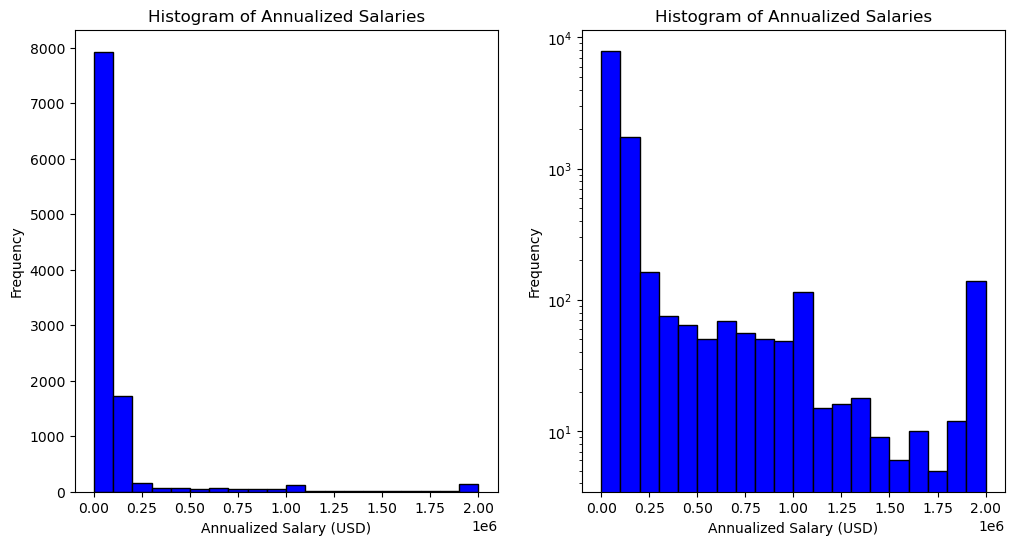

In [20]:
# Plot a histogram of ConvertedComp.
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,con)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['ConvertedComp'], bins=20, color='blue', edgecolor = "black")
plt.title('Histogram of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Frequency')

# Since we have a wide range of value let's set logarithmic scale on the y-axis
plt.subplot(1, 2, 2)
plt.hist(df['ConvertedComp'], bins=20, color='blue', edgecolor = "black")
plt.yscale('log')
plt.title('Histogram of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Frequency')
plt.show()

#### Box Plots

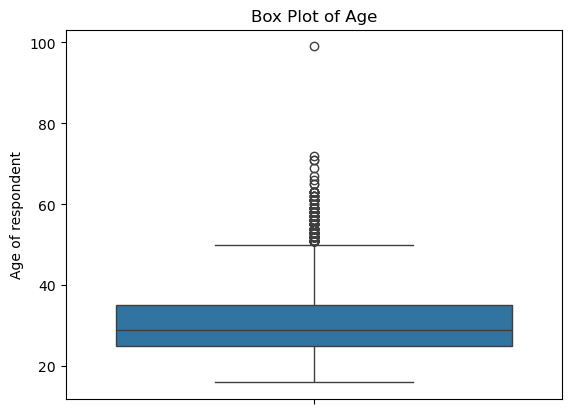

In [26]:
#Plot a box plot of Age.
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,con)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age of respondent')
plt.show()

We have an outlier with around 100 years old it should be an error. We must consider to remove that value

### Visualizing relationships in data

#### Scatter Plots

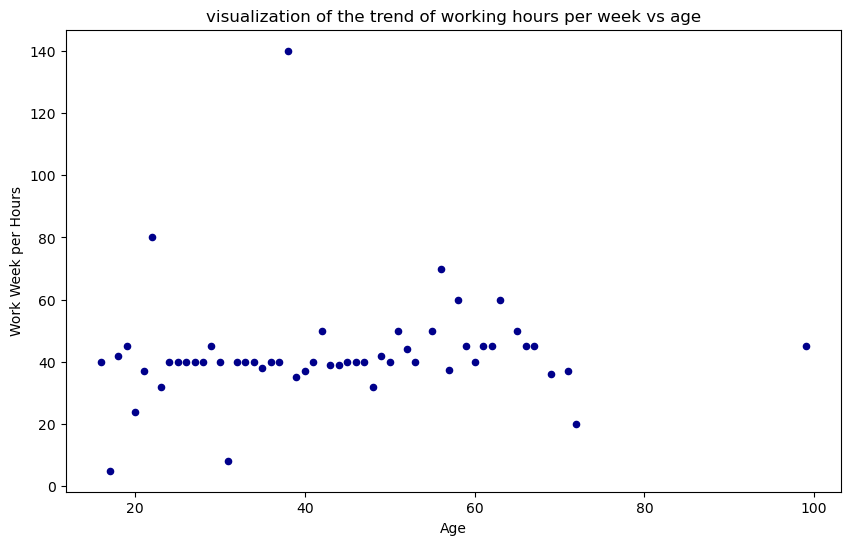

In [33]:
#Create a scatter plot of 'Age' and 'WorkWeekHrs'.
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
group by age
"""
df = pd.read_sql_query(QUERY,con)

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('visualization of the trend of working hours per week vs age')
plt.xlabel('Age')
plt.ylabel('Work Week per Hours')

plt.show()

#### Bubble Plots

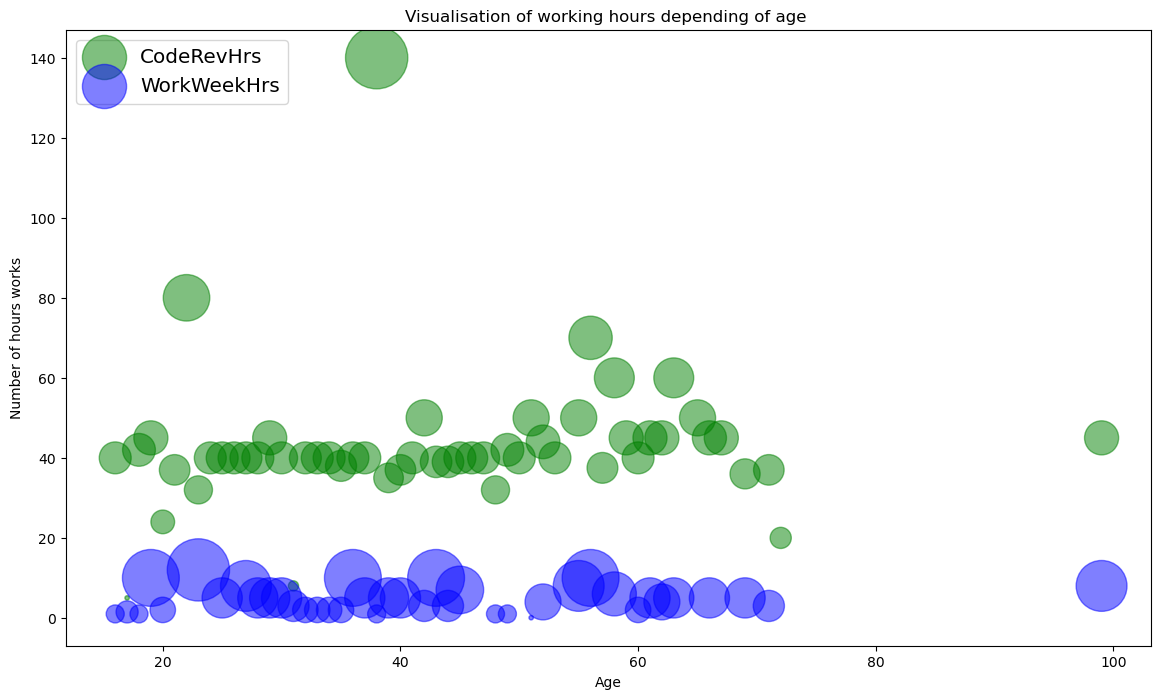

In [39]:
#Let's create a bubble plot of WorkWeekHrs and CodeRevHrs, using Age column as bubble size.
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
group by Age
"""
df = pd.read_sql_query(QUERY,con)

# normalize WorkWeekHrs data
norm_WorkHrs = (df['WorkWeekHrs'] - df['WorkWeekHrs'].min()) / (df['WorkWeekHrs'].max() - df['WorkWeekHrs'].min())

# normalize CodeRevHrs data
norm_CodeHrs = (df['CodeRevHrs'] - df['CodeRevHrs'].min()) / (df['CodeRevHrs'].max() - df['CodeRevHrs'].min())

# WorkWeekHrs
ax0 = df.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_WorkHrs  * 2000 + 10,  # pass in weights 
                    #xlim=(1975, 2015)
                    )

# CodeRevHrs
ax1 = df.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm_CodeHrs  * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of hours works')
ax0.set_title('Visualisation of working hours depending of age ')
ax0.legend(['CodeRevHrs', 'WorkWeekHrs'], loc='upper left', fontsize='x-large')

### Visualizing composition of data


#### Pie Charts

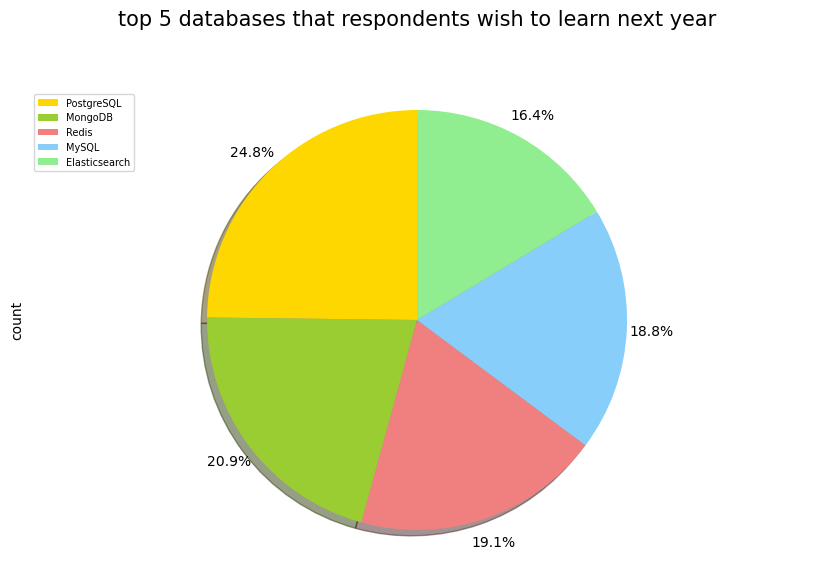

In [53]:
#Let's create a pie chart of the top 5 databases that respondents wish to learn next year
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,con)
df.set_index('DatabaseDesireNextYear', inplace=True)
 

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each database with which to offset each wedge.

df['count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('top 5 databases that respondents wish to learn next year', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left', fontsize=7) 

plt.show()

#### Stacked Charts

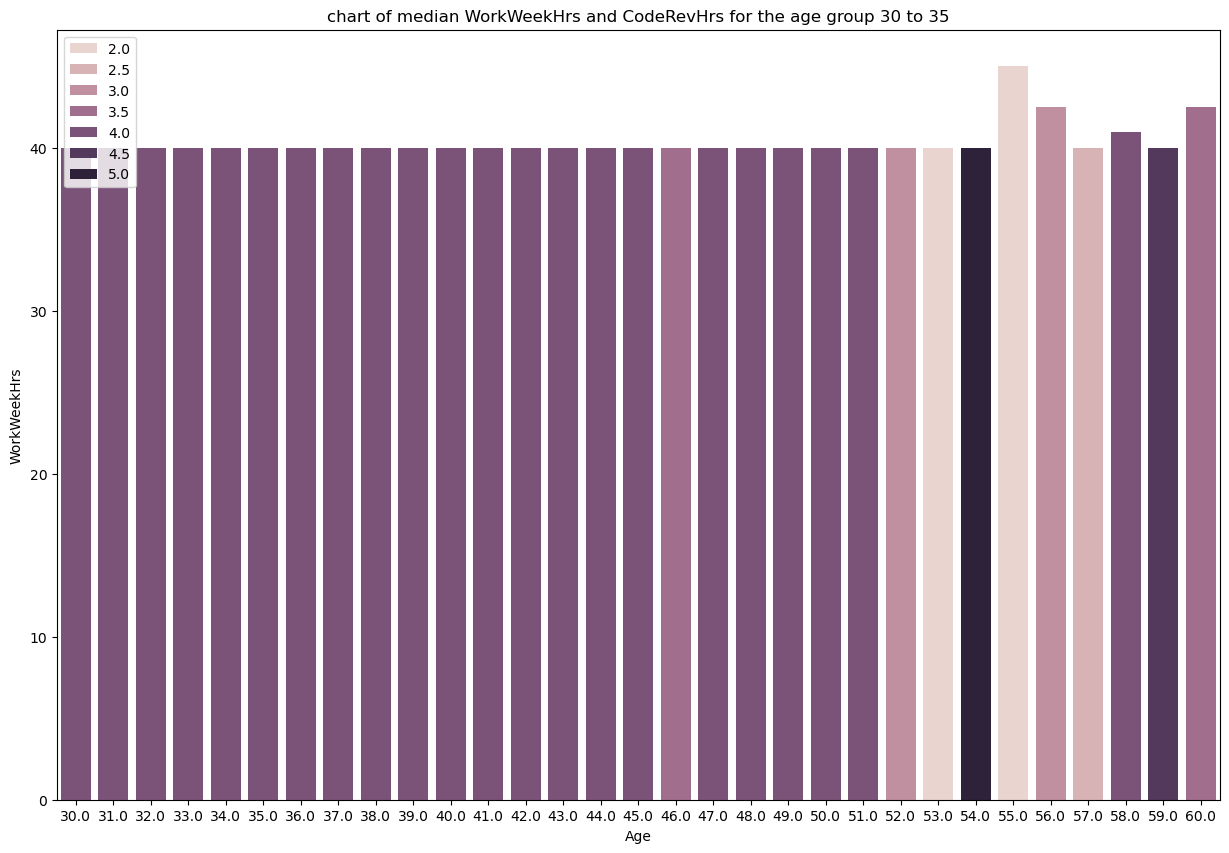

In [78]:
# Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 60"""
df = pd.read_sql_query(QUERY,con)
#df
grouped_df = df.groupby(['Age'],as_index= False).median()

plt.figure(figsize=(15, 10))
sns.barplot(x='Age', y='WorkWeekHrs', hue='CodeRevHrs', data=grouped_df)
plt.title('chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 60')
plt.legend(loc='upper left')


### Visualizing comparison of data

#### Line Chart

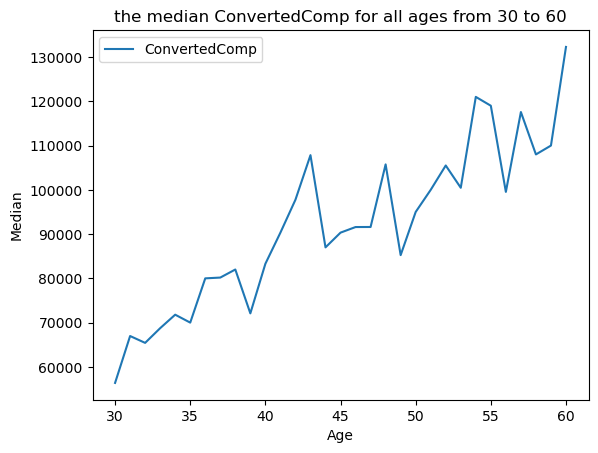

In [84]:
# Plot the median `ConvertedComp` for all ages from 30 to 60.
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 30 AND 60
"""
df = pd.read_sql_query(QUERY,con)
grouped_df = df.groupby(['Age'],as_index= False).median()
grouped_df.plot(x='Age', y='ConvertedComp')
plt.xlabel('Age')
plt.ylabel('Median')
plt.title('the median ConvertedComp for all ages from 30 to 60')
plt.show()

#### Bar Chart

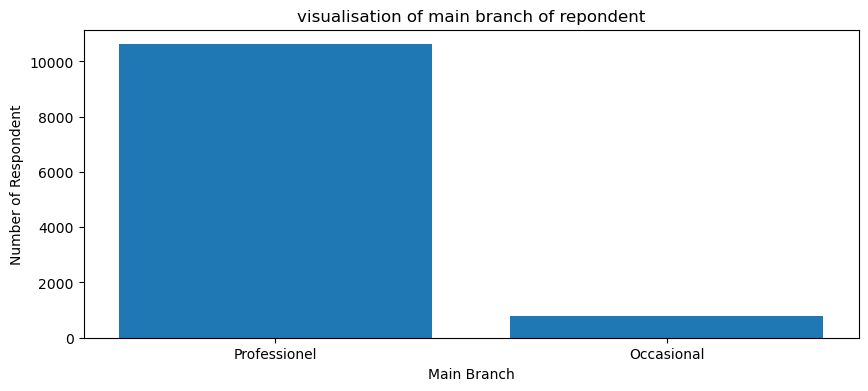

In [103]:
# Create a horizontal bar chart using column 'MainBranch'.
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
group by MainBranch
"""
df = pd.read_sql_query(QUERY,con)
#resetting the index back to original way
df_bar_5=df.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.MainBranch)
label[0]='Professionel'
label[1]='Occasional'

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df['count'], label=label)
ax.set_title('visualisation of main branch of repondent')
ax.set_ylabel('Number of Respondent')
ax.set_xlabel('Main Branch')

plt.show()

#### Close the database connection.

In [107]:
con.close()